# 🌟 **Giám sát bảo hộ lao động tại công trường bằng CNN** 🌟  
### 📚 **Đồ án môn học:** Thị giác máy tính
## 📝 **Thông tin nhóm**  
<style>
  table {
    width: 100%;
    border-collapse: collapse;
    font-size: 16px; /* Tăng kích thước chữ */
  }
  th, td {
    border: 1px solid #ddd;
    padding: 10px;
    text-align: left;
  }
  th {
    background-color: #f2f2f2;
  }
</style>
<div>  
<table style="width:100%; font-size: 24px; border-collapse: collapse; text-align: left;">  
  <tr style="border-bottom: 1px solid #ddd;">  
    <th style="padding: 8px;">Họ và Tên</th>  
    <th style="padding: 8px;">MSSV</th>  
  </tr>  
  <tr>  
    <td style="padding: 8px;">Trần Nguyên Bình</td>  
    <td style="padding: 8px;">21E1010005</td>  
  </tr>  
  <tr>  
    <td style="padding: 8px;">Lê Bá Quốc Trung</td>  
    <td style="padding: 8px;">21E1020020</td>  
  </tr>  
</table>  
</div>  

---
## 💡 **Giới thiệu**  
**Convolutional Neural Networks (CNN)** là một phương pháp học sâu mạnh mẽ, được thiết kế đặc biệt để xử lý dữ liệu hình ảnh. Với khả năng tự động trích xuất các đặc trưng quan trọng từ dữ liệu đầu vào, CNN đã trở thành công cụ phổ biến trong các bài toán nhận diện và phân loại hình ảnh.

Trong đồ án này, CNN sẽ được sử dụng để phân tích các bức ảnh và xác định xem nội dung trong ảnh có tuân thủ các tiêu chuẩn an toàn lao động hay không. Hệ thống sẽ dựa trên một tập dữ liệu đã được thu thập và gán nhãn trước đó, đóng vai trò cốt lõi trong việc phát hiện các trường hợp không đảm bảo an toàn lao động.  

---
### 🎯 **Mục tiêu:**
1. Chuẩn bị và xử lý dữ liệu hình ảnh.  
2. Nghiên cứu và xây dựng mô hình CNN.    
3. Huấn luyện, tinh chỉnh mô hình và đánh giá hiệu suất.

### **1\. Giới thiệu tập dữ liệu**

### **2\. Thiết lập môi trường**

#### **2\.1 Import các thư viện cần thiết**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

#### **2\.2 Kết nối với Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MAIN_PATH = "/content/drive/MyDrive/Năm4HK1/computer_vision/Project"

#### **2\.3 Đọc tập dữ liệu**

Giải nén tập dữ liệu

In [ ]:
!unzip -q "/content/drive/MyDrive/Năm4HK1/computer_vision/Project/dataset/Worksite_Safety_Monitoring_Dataset.zip" -d "/content/"

Đọc và phân tập dữ liệu thành các tập train, valid và test

In [ ]:
img_size = 224
batch_size= 64

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Worksite-Safety-Monitoring-Dataset/train', labels='inferred',
    label_mode='int', class_names=None, batch_size=batch_size,
    image_size=(img_size,img_size), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Worksite-Safety-Monitoring-Dataset/valid', labels='inferred',
    label_mode='int', class_names=None, batch_size=batch_size,
    image_size=(img_size,img_size), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Worksite-Safety-Monitoring-Dataset/test', labels='inferred',
    label_mode='int', class_names=None, batch_size=batch_size,
    image_size=(img_size,img_size), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False
)

Found 1620 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


Hiển thị một số hình ảnh trong tập dữ liệu

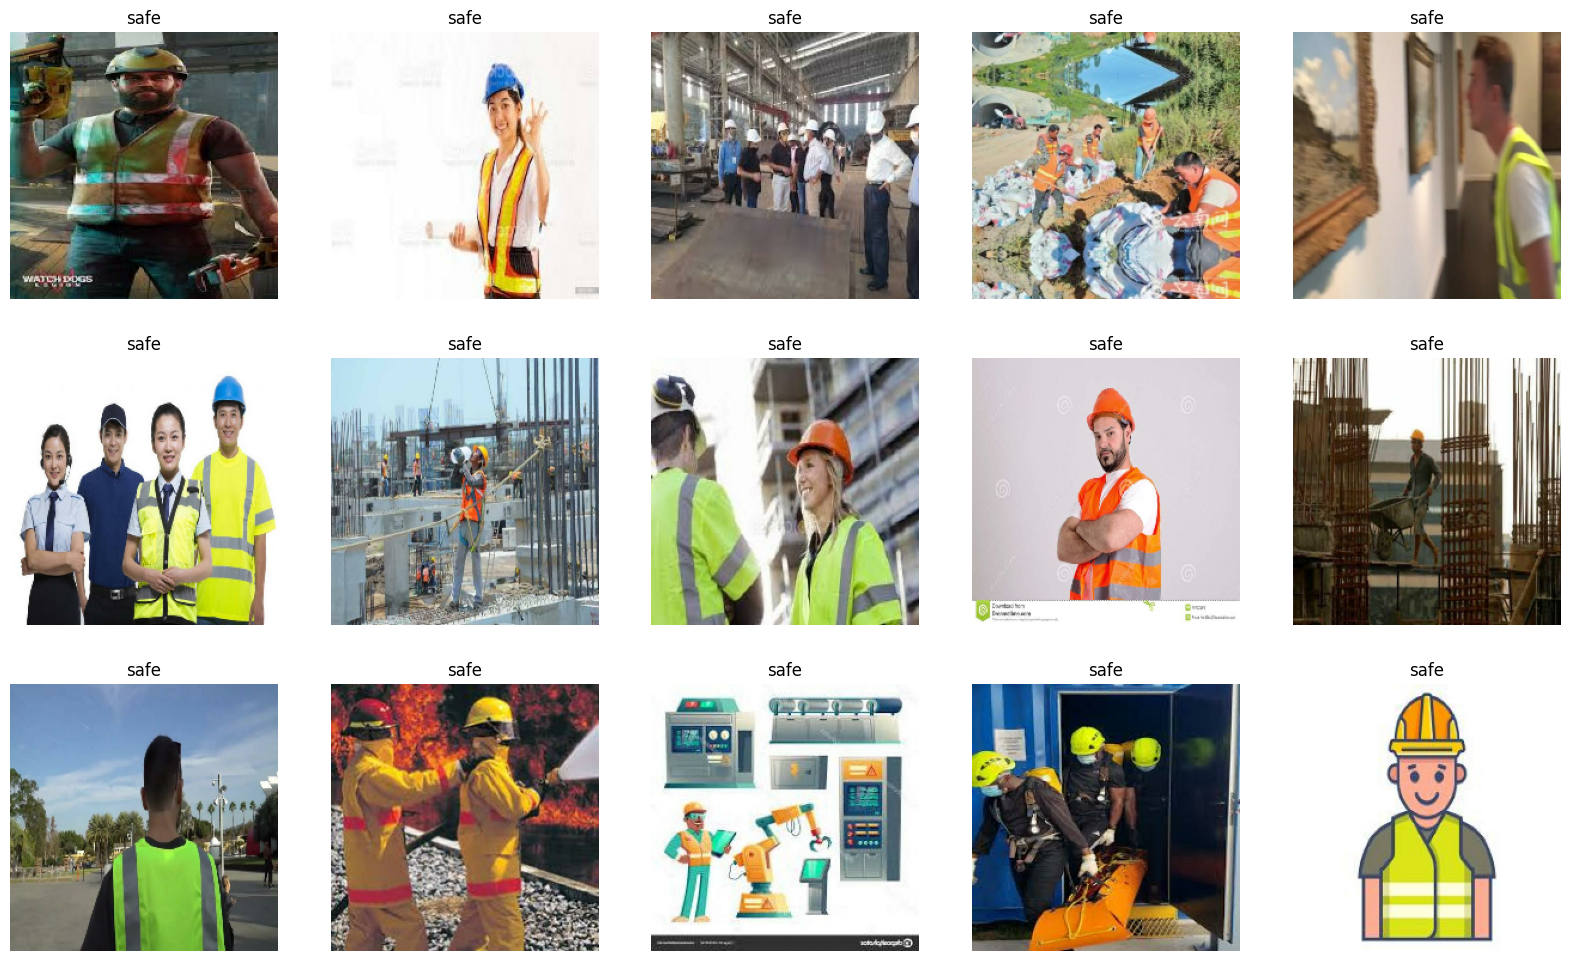

In [ ]:
class_names = train_data.class_names
plt.figure(figsize=(20,12))
for x in train_data.take(1):
    for i in range(15):
        plt.subplot(3,5,i+1)
        image = x[0][i] / 255.
        plt.imshow(image)
        label_index = np.argmax(x[1][i].numpy())
        plt.title(class_names[label_index])
        plt.axis('off')

### **3\. Huấn luyện mô hình CNN**

#### **3\.1 Thiết kế mô hình**

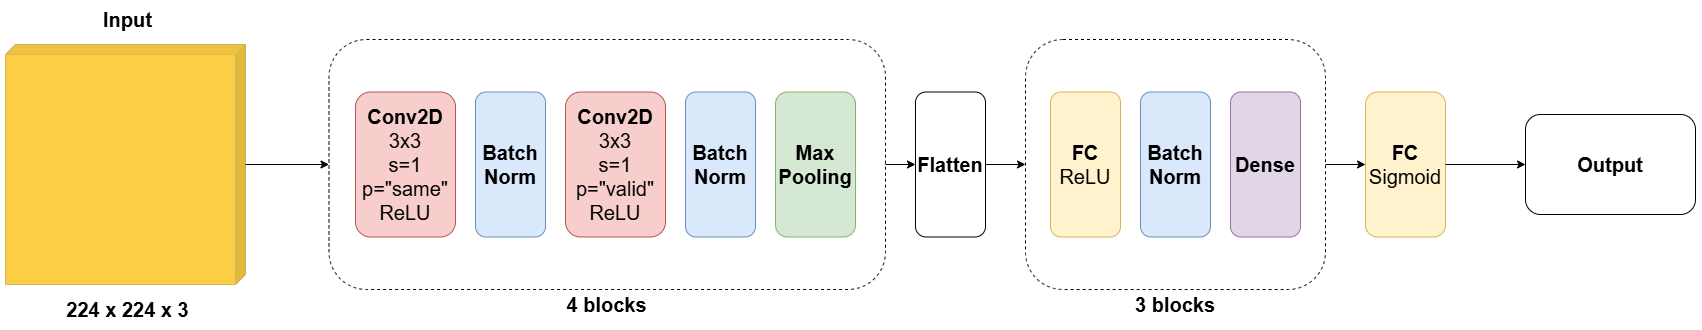

#### **3\.2 Xây dựng mô hình**

In [ ]:
def build_binary_deep_CNN(input_shape=(224, 224, 3)):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
model = build_binary_deep_CNN(input_shape=(224, 224, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 111, 111, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 111, 111, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 54, 54, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 52, 52, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 512)         │       2,359,8

 Total params: 42,610,241 (162.55 MB)

 Trainable params: 42,604,609 (162.52 MB)

 Non-trainable params: 5,632 (22.00 KB)

#### **3\.3 Huấn luyện mô hình**

Thiết lập phương pháp tối ưu hóa mô hình

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Tiến hành huấn luyện

In [ ]:
epochs = 50
history_gd = model.fit(train_data, validation_data = val_data, epochs = epochs)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.5123 - loss: 1.0477 - val_accuracy: 0.5000 - val_loss: 15.2594
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 59s 818ms/step - accuracy: 0.5886 - loss: 0.8423 - val_accuracy: 0.4800 - val_loss: 3.9780
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 834ms/step - accuracy: 0.5690 - loss: 0.8134 - val_accuracy: 0.4900 - val_loss: 1.5048
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 820ms/step - accuracy: 0.5787 - loss: 0.8269 - val_accuracy: 0.5500 - val_loss: 1.1444
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 845ms/step - accuracy: 0.5693 - loss: 0.7909 - val_accuracy: 0.5150 - val_loss: 0.8199
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 819ms/step - accuracy: 0.6205 - loss: 0.7263 - val_accuracy: 0.5750 - val_loss: 0.8774
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 843ms/step - accuracy: 0.6040 - loss: 0.7145 - val_accuracy: 0.6050 - val_loss: 0.8180
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 840ms/step - accuracy: 0.6360 - loss: 0.6670 - val_accur

Trực quan hóa quá trình huấn luyện

In [ ]:
def plot_history(history):
    history_dict = history.history

    fig, ax = plt.subplots(1, 2, figsize=(30, 10))

    ax[0].plot(list(range(len(history_dict['loss']))), history_dict["loss"], 'ro-', lw=3, markersize=8, label="training loss")
    ax[0].plot(list(range(len(history_dict['loss']))), history_dict["val_loss"], 'b^-', lw=3, markersize=8, label="validation loss")

    ax[1].plot(list(range(len(history_dict['loss']))), history_dict["accuracy"], 'ro-', lw=3, markersize=8, label="training accuracy")
    ax[1].plot(list(range(len(history_dict['loss']))), history_dict["val_accuracy"], 'b^-', lw=3, markersize=8, label="validation accuracy")

    ax[0].legend(loc="upper right")
    ax[1].legend(loc="upper left")

    ax[0].set_xlabel("epochs", fontsize=12, weight='bold')
    ax[1].set_xlabel("epochs", fontsize=12, weight='bold')

    ax[0].set_ylabel("loss", fontsize=12, weight='bold')
    ax[1].set_ylabel("accuracy", fontsize=12, weight='bold')

    fig.text(0.515, .93, "Model learning curves", ha="center", va="top", fontsize=18, weight='bold')
    plt.show()

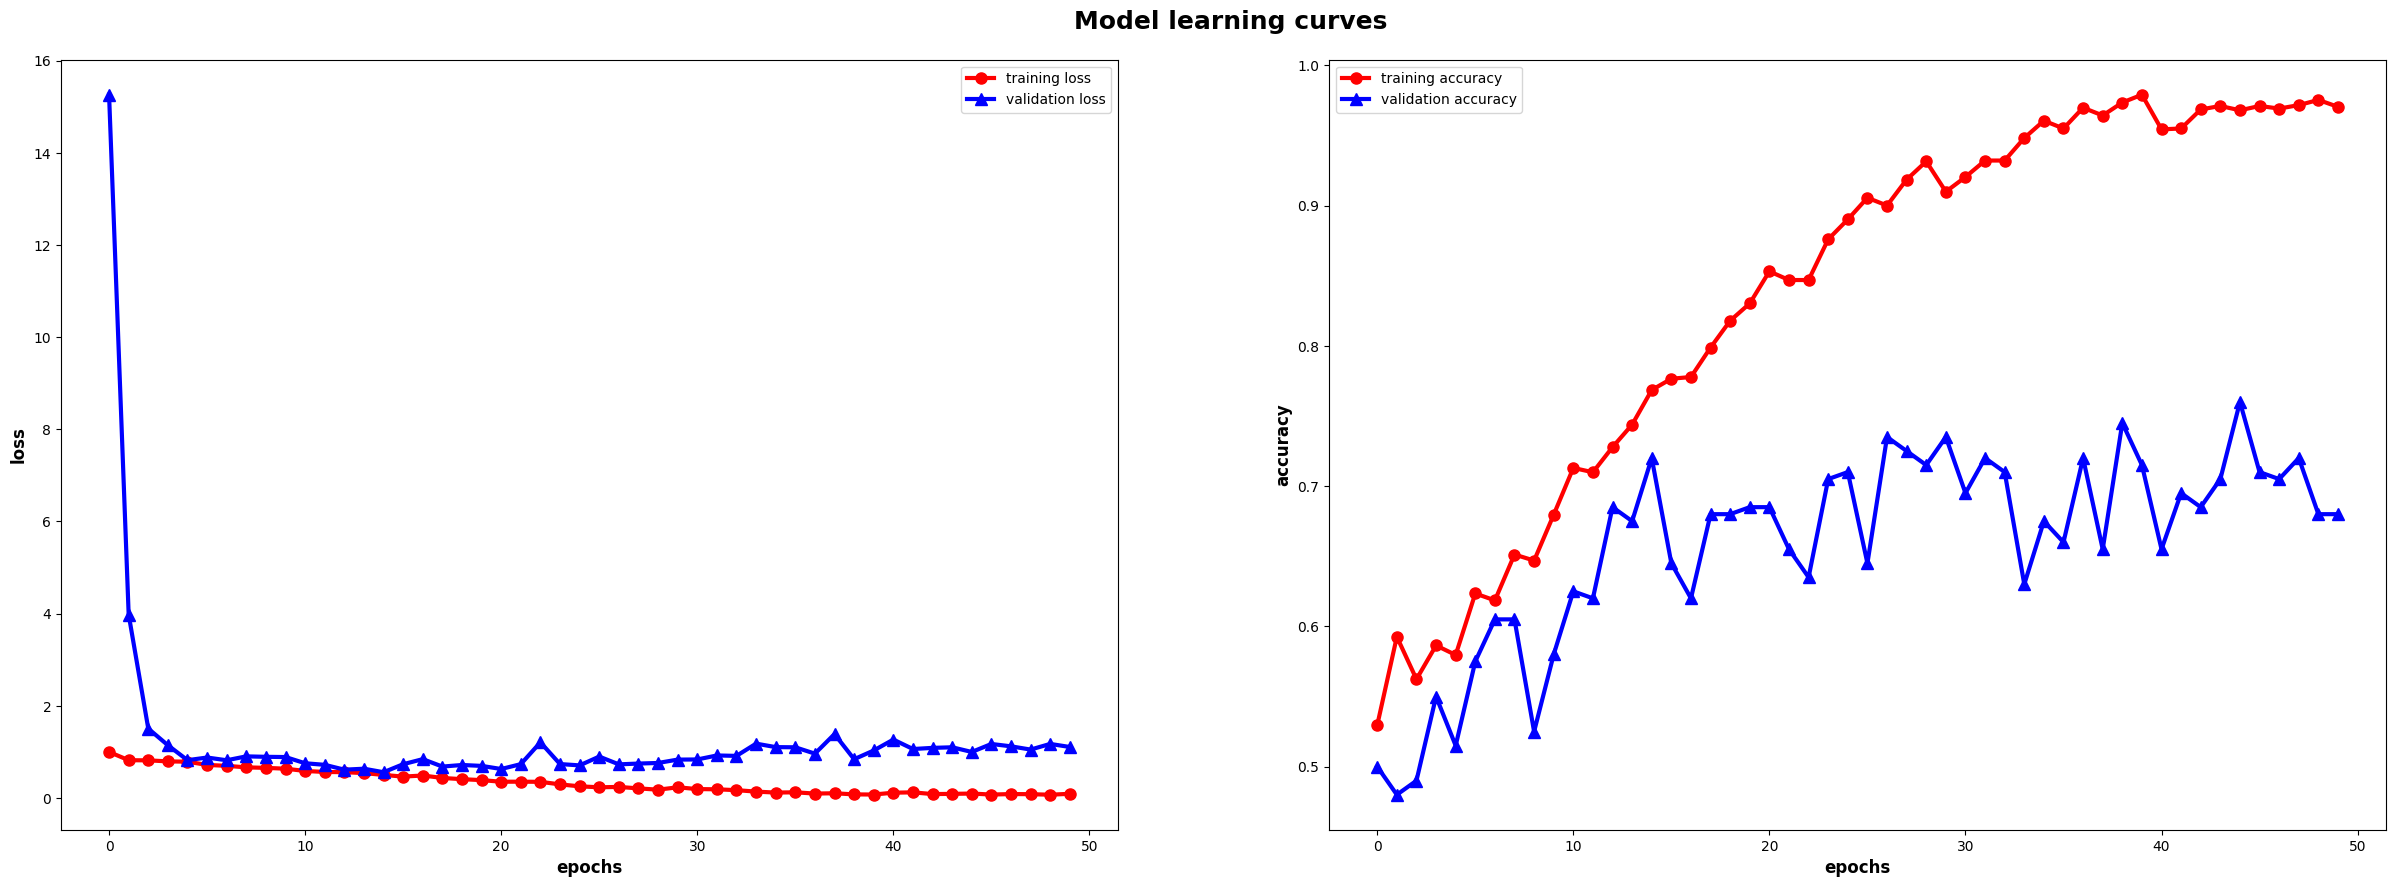

In [ ]:
plot_history(history_gd)

Lưu mô hình

In [ ]:
model.save(f'{MAIN_PATH}/cnn_models/binary_CNN_model_{batch_size}_batch_{epochs}_epoch_.h5')

Load mô hình đã huấn luyện

In [ ]:
loaded_model = tf.keras.models.load_model(f'{MAIN_PATH}/cnn_models/binary_CNN_model_{batch_size}_batch_{epochs}_epoch_.h5')

### **4\. Đánh giá mô hình**

Một số độ đo phổ biến

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

y_true = []
y_pred = []

batch_index = 0
for batch_images, batch_labels in test_data:
    print(f"Tiến hành dự đoán cho batch số {batch_index+1}:")
    batch_index += 1
    true_labels = batch_labels.numpy().astype(int)
    predictions = loaded_model.predict(batch_images)
    predicted_labels = (predictions > 0.5).astype(int)
    y_true.extend(true_labels)
    y_pred.extend(predicted_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("===================================")
print("Kết quả cuối cùng:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Tiến hành dự đoán cho batch số 1:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Tiến hành dự đoán cho batch số 2:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Tiến hành dự đoán cho batch số 3:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Tiến hành dự đoán cho batch số 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Kết quả cuối cùng:
Accuracy: 0.7550
Precision: 0.7684
Recall: 0.7300


Confusion matrix:

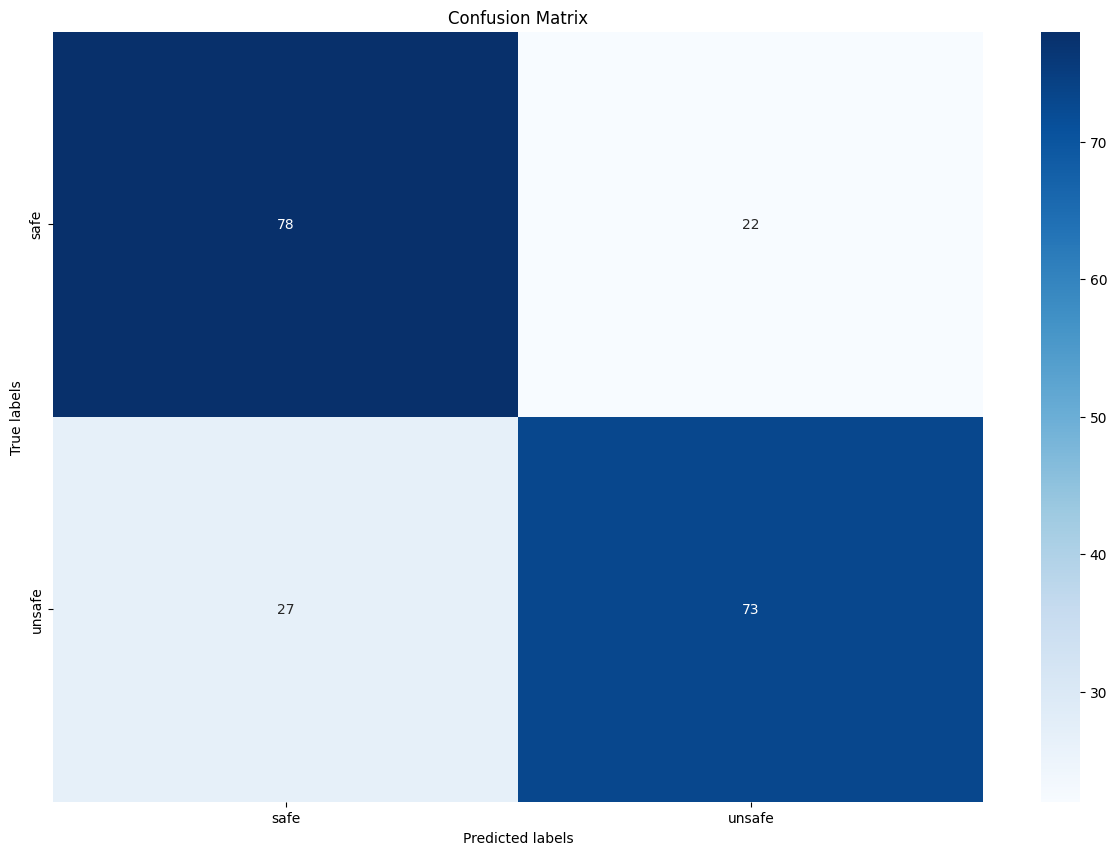

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### **5\. Ứng dụng mô hình**

Hàm dự đoán và trực quan hóa kết quả:

In [ ]:
def predict(model, image_paths, class_names):
    num_images = len(image_paths)
    rows = (num_images + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

    for i, image_path in enumerate(image_paths):
        try:
            img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.utils.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)

            predictions = model.predict(img_array)
            predicted_class = class_names[1] if predictions[0] > 0.5 else class_names[0]

            row = i // 3
            col = i % 3

            axes[row, col].imshow(img)
            axes[row, col].axis('off')
            axes[row, col].text(0.5, 0, f"Predicted class: {predicted_class}",
                                ha='center', va='top', fontsize=12, transform=axes[row, col].transAxes)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    for i in range(num_images, rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    plt.show()


Tiến hành dự đoán:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


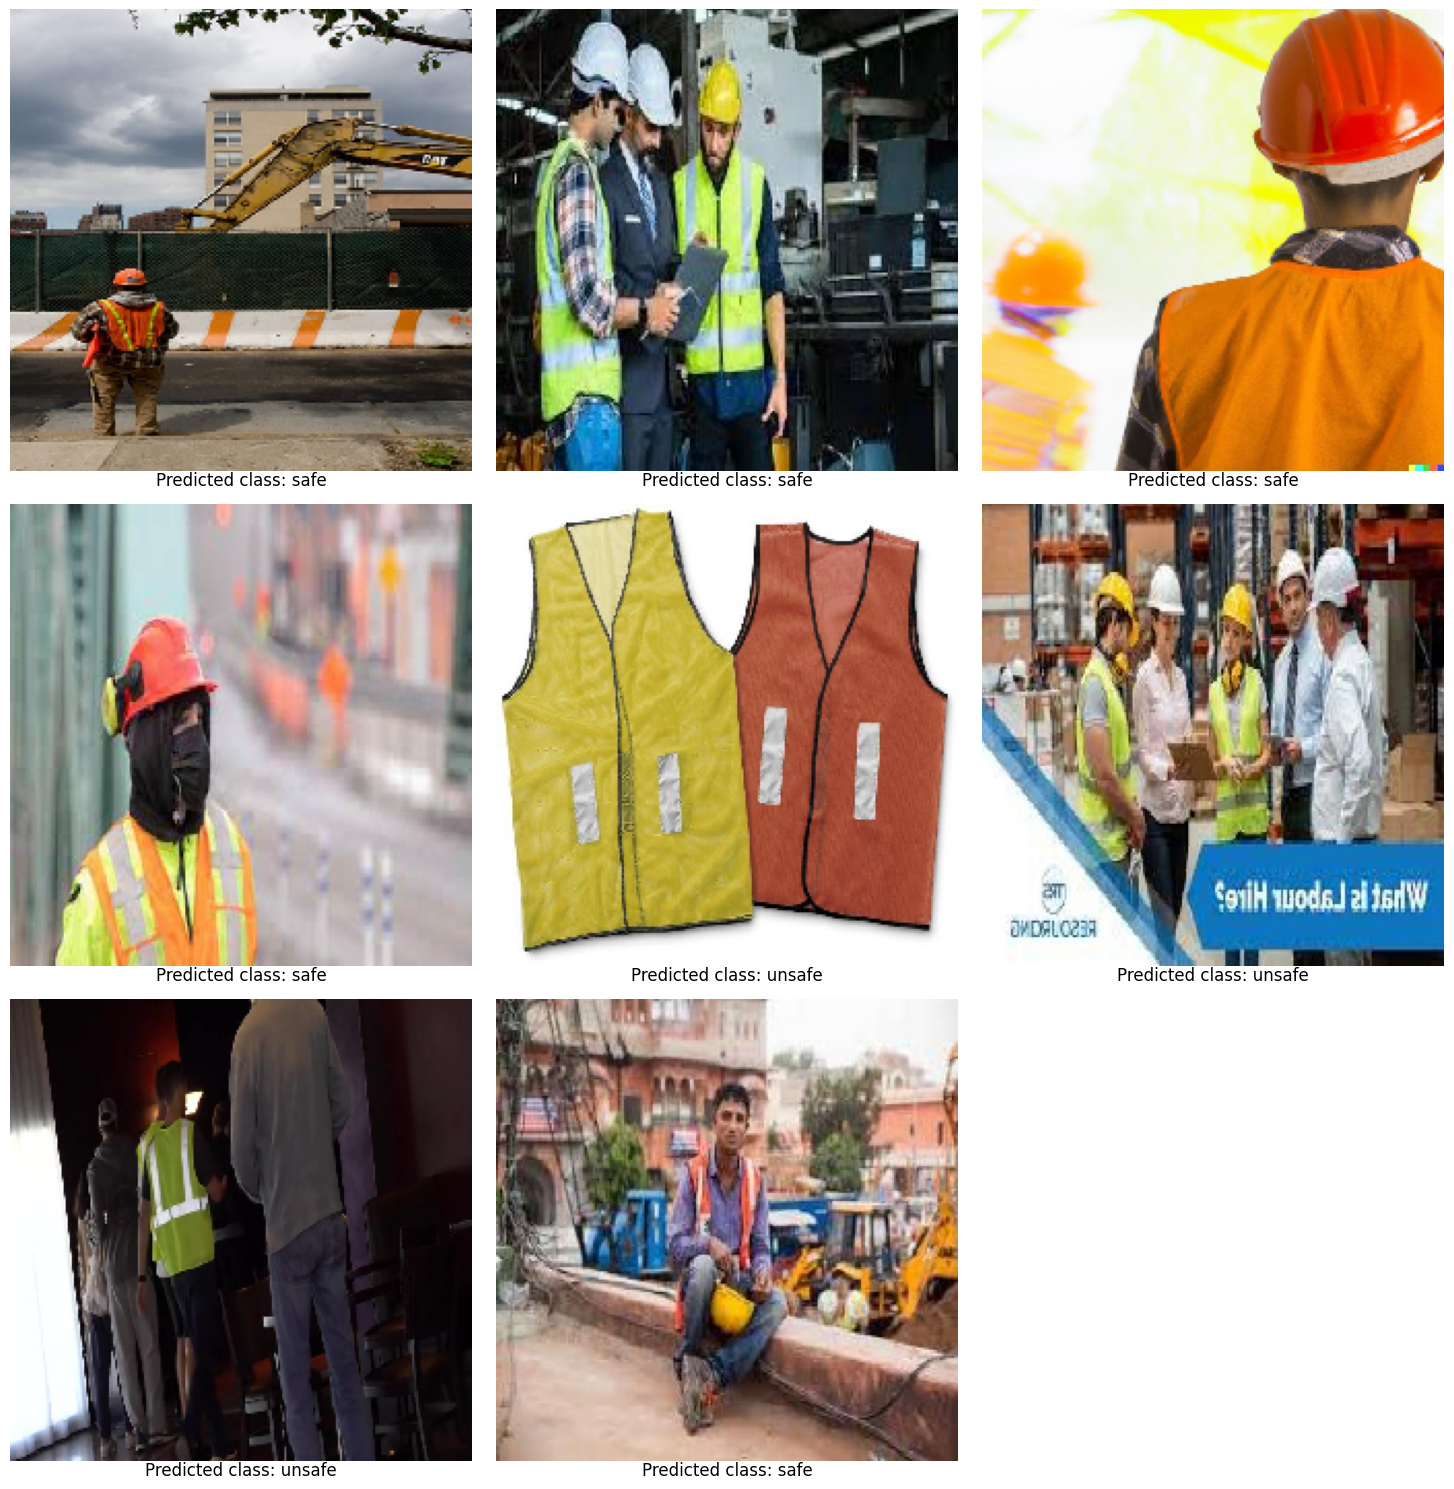

In [ ]:
import os
import random

def get_random_image_paths(test_dir, n):
    safe_images = [os.path.join(test_dir, 'safe', fname) for fname in os.listdir(os.path.join(test_dir, 'safe')) if fname.endswith(('jpg', 'png', 'jpeg'))]
    unsafe_images = [os.path.join(test_dir, 'unsafe', fname) for fname in os.listdir(os.path.join(test_dir, 'unsafe')) if fname.endswith(('jpg', 'png', 'jpeg'))]
    return random.sample(safe_images, n) + random.sample(unsafe_images, n)

image_paths = get_random_image_paths("/content/Worksite-Safety-Monitoring-Dataset/test", 4)
predict(loaded_model, image_paths, class_names)